<a href="https://colab.research.google.com/github/Aditya-y9/StockMarketML/blob/main/StockMarketML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Predictor (Advanced)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [61]:
# website used to
!pip install quandl
import quandl

In [62]:
stock = yf.Ticker("HINDUNILVR.NS")

Stock prices are time-series data (with time the data variable is changing)

In [63]:
history = stock.history(period="max")

In [64]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,0.0,0.0
1996-01-02 00:00:00+05:30,34.689383,35.191721,34.700609,35.059822,203500,0.0,0.0
1996-01-03 00:00:00+05:30,35.059827,34.995280,34.686581,34.852158,58000,0.0,0.0
1996-01-04 00:00:00+05:30,34.798843,34.967224,34.742716,34.854969,111500,0.0,0.0
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,0.0,0.0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,0.0,0.0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,0.0,0.0


In [65]:
history.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2024-01-09 00:00:00+05:30', '2024-01-10 00:00:00+05:30',
               '2024-01-11 00:00:00+05:30', '2024-01-12 00:00:00+05:30',
               '2024-01-15 00:00:00+05:30', '2024-01-16 00:00:00+05:30',
               '2024-01-17 00:00:00+05:30', '2024-01-18 00:00:00+05:30',
               '2024-01-19 00:00:00+05:30', '2024-01-20 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7054, freq=None)

# CLEANING AND VISUALIZING

<Axes: xlabel='Date'>

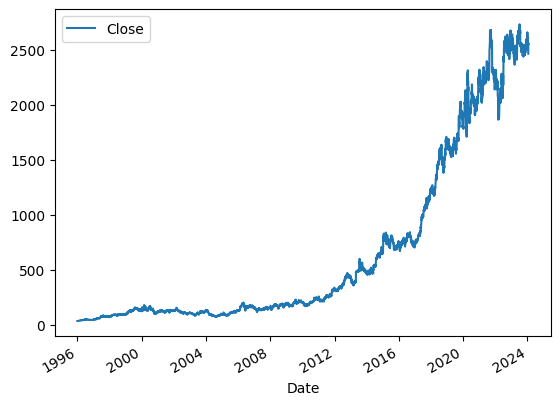

In [66]:
history.plot.line(y="Close",use_index=True)

In [67]:
# Why didnt I buy this! (crying)

In [68]:
# delete unnecessary columns
del history["Dividends"]
del history["Stock Splits"]

# Setting up our TARGET for ML

In [69]:
# creating a column for Tomorrow's Price
history["Tomorrow"]  = history["Close"].shift(-1)

# shifted all prices back one day

In [70]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,35.059822
1996-01-02 00:00:00+05:30,34.689383,35.191721,34.700609,35.059822,203500,34.852158
1996-01-03 00:00:00+05:30,35.059827,34.995280,34.686581,34.852158,58000,34.854969
1996-01-04 00:00:00+05:30,34.798843,34.967224,34.742716,34.854969,111500,34.798836
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,34.812862
...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902


In [71]:
# boolean indicating if tomorrow's price is greater than today's price

# then converting it to binary data for our model
history["Target"] = (history["Tomorrow"] > history["Close"]).astype(int)

In [72]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1996-01-01 00:00:00+05:30,34.911098,35.121575,34.689396,34.689396,11000,35.059822,1
1996-01-02 00:00:00+05:30,34.689383,35.191721,34.700609,35.059822,203500,34.852158,0
1996-01-03 00:00:00+05:30,35.059827,34.995280,34.686581,34.852158,58000,34.854969,1
1996-01-04 00:00:00+05:30,34.798843,34.967224,34.742716,34.854969,111500,34.798836,0
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,34.812862,1
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902,0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000,0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902,1


In [73]:
# only take data which is relatively naya
history = history.loc["2010-01-01":].copy()

In [74]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00+05:30,205.037266,206.121319,204.495263,204.959854,668858,204.301666,0
2010-01-05 00:00:00+05:30,205.772850,206.276147,203.256343,204.301666,1392726,205.463120,1
2010-01-06 00:00:00+05:30,204.998529,205.966416,203.333767,205.463120,1682107,205.037216,0
2010-01-07 00:00:00+05:30,205.269523,206.934285,204.533920,205.037216,2723548,205.927765,1
2010-01-08 00:00:00+05:30,205.269597,206.740781,204.533993,205.927765,4000986,206.043900,1
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902,0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000,0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902,1


# Training an initial Machine Learning Model

In [75]:
from sklearn.ensemble import RandomForestClassifier


# work by training randomparameters and average out.
# resistant to overfitting
# can pick up non-linear tendencies in the data

# for example open price is not linearly related with the target
                              # higher --> better  , optimum  ,
model = RandomForestClassifier(n_estimators=1000,min_samples_split = 100,random_state = 1)


# splitting data

# all rows till 100 in the trauning set
train = history.iloc[:-100]



# last hundred rows in the test set
test = history.iloc[-100:]




predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [76]:
from sklearn.metrics import precision_score


# exam time!


preds = model.predict(test[predictors])

In [77]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [78]:
precision_score(test["Target"],preds)

0.5735294117647058

# Making the Model Better

In [79]:
combined  = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

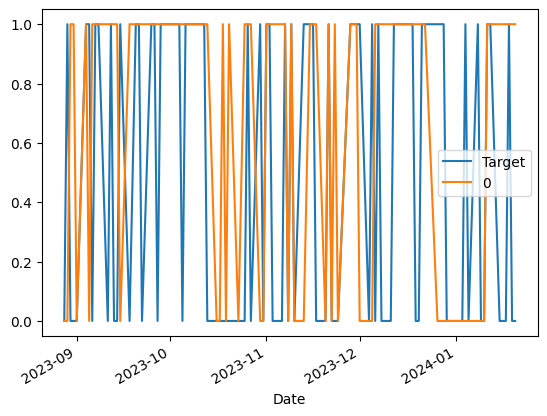

In [80]:
combined.plot()

# Building a BackTesting System

In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [82]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)
  

In [83]:
predictions = backtest(history, model, predictors)

In [85]:
if 'Predictions' in predictions.columns:
    print(predictions["Predictions"].value_counts())
else:
    print("The 'Predictions' column does not exist in the DataFrame.")


Predictions
0    510
1    460
Name: count, dtype: int64
